THE SPARKS FOUNDATION #GRIPSEP23

Author: SWATI NANDI,DATA SCIENCE & BUSINESS ANALYTICS INTERN

Task 1: Prediction Using Supervised Machine Learning

Perform : In this regression task,we will predict the percentage of marks that a student in expected to score based upon the number of hours they studied.We use the available at http://bit.ly/w-data

Importing Modules:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading and Preparing Data:

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', data.shape)
data.head()

Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#checking for any missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


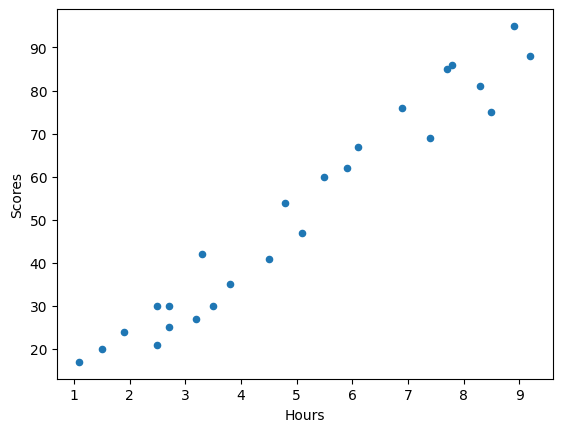

In [ ]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.show()

In [ ]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [ ]:
hours = data['Hours']
scores = data['Scores']

<ipython-input-12-a4006d7fac6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours)


<Axes: xlabel='Hours', ylabel='Density'>

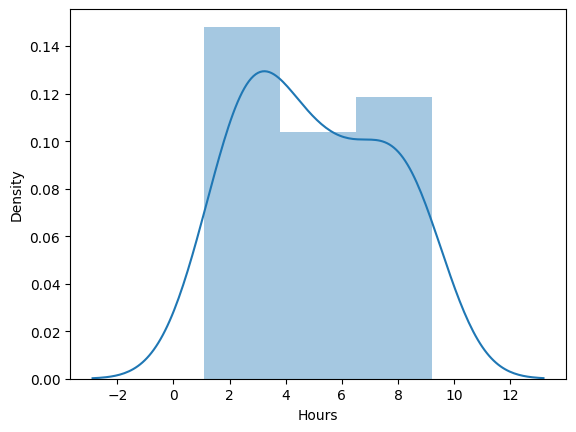

In [ ]:
sns.distplot(hours)

<ipython-input-13-cd71314d34aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


<Axes: xlabel='Scores', ylabel='Density'>

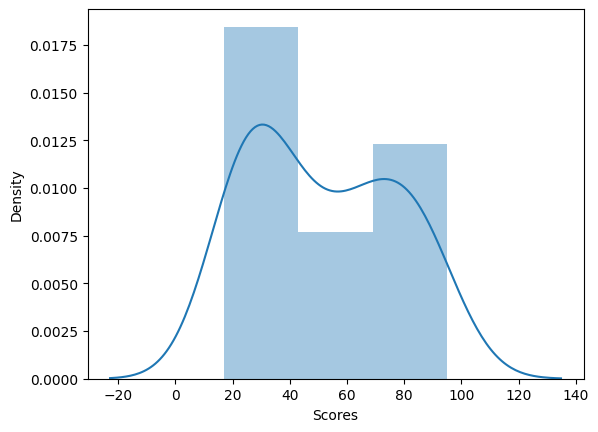

In [ ]:
sns.distplot(scores)

Linear Regression:

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

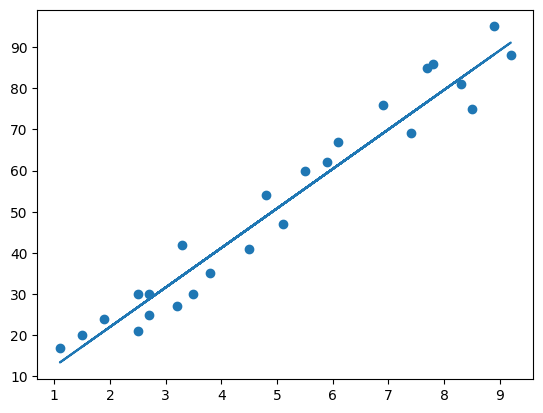

In [ ]:
m=reg.coef_
c=reg.intercept_
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


<ipython-input-22-956bf8018746>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(y_test-y_pred))


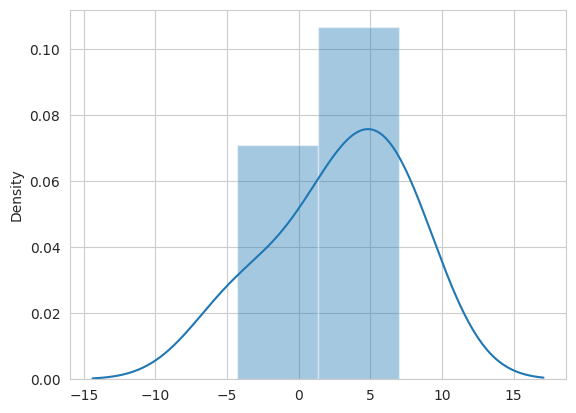

In [ ]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

what would be the predicted score if a student studies for 9.25 hours/day?

In [ ]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams.


Model Evaluation:

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
